<a href="https://colab.research.google.com/github/AlexMa123/BIU-ComplexSystem/blob/main/Lecture%202%20-%20Statistics%20and%20entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to statistical functions in python and entropy

## scipy.stats -- module for statistics

`scipy` is a collection of mathematical algorithms and convenience functions built on Numpy. 

`scipy.stats` is the module in scipy that contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests and more  

### Probability distributions

Each univariate distribution is an instance of a subclass of `rv_continuous` or `rv_discrete`

#### Continous distribution

##### Define a continous random distribution object

In [ ]:
from scipy.stats import norm
normal_distribution = norm(loc=0, scale=1) # define an instance of a normal distribution

> if $f(x)$ is the standard distribution, then the parameter loc and scale means $f\left(\frac{x - loc}{scale} \right)$

##### The probability density function (pdf), cumulative distribution function (cdf), Survival function (1 - cdf) and percent point function (ppf)

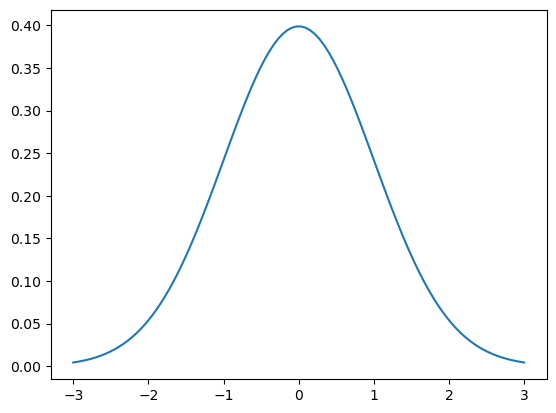

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# the probability density function (pdf) of a normal distribution
x = np.linspace(-3, 3, 100)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf)

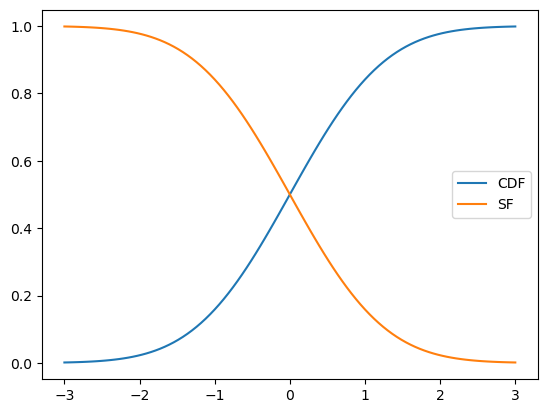

In [ ]:
# CDF and SF
cdf = normal_distribution.cdf(x)
sf = normal_distribution.sf(x)

plt.plot(x, cdf, label='CDF')
plt.plot(x, sf, label='SF')
plt.legend()

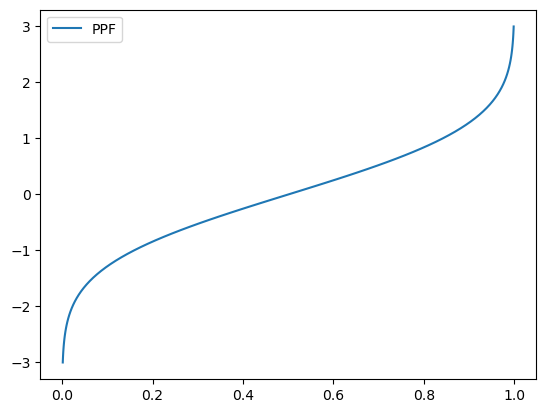

In [ ]:
# PPF percent point function
ppf = normal_distribution.ppf(cdf)
plt.plot(cdf, ppf, label='PPF')
plt.legend()

In [ ]:
# use the figure I showed in the first lecture to explain the confidence interval
normal_distribution.ppf([0.025, 1 - 0.025])

array([-1.95996398,  1.95996398])

##### Some useful measurment

In [ ]:
# measurement from a distribution
print("Mean: ", normal_distribution.mean())
print("median ", normal_distribution.median())
print("variance: ", normal_distribution.var())
print("standard deviation: ", normal_distribution.std())
print("entropy", normal_distribution.entropy())
print("nth (n=1) moment: ", normal_distribution.moment(1))
print("nth (n=2) moment: ", normal_distribution.moment(2))
print("nth (n=3) moment: ", normal_distribution.moment(3))
print("confidence interval", normal_distribution.interval(0.95))

Mean:  0.0
median  0.0
variance:  1.0
standard deviation:  1.0
entropy 1.4189385332046727
nth (n=1) moment:  0.0
nth (n=2) moment:  1.0
nth (n=3) moment:  0.0
confidence interval (-1.959963984540054, 1.959963984540054)


##### Generate random variables (rvs)

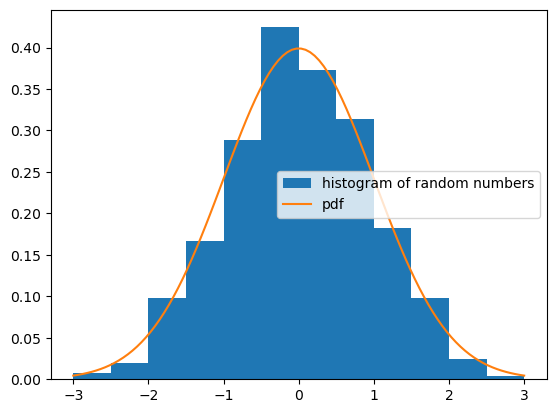

In [ ]:
# we can also generate random numbers from the distribution we defined 
# more random numbers, the more accurate the distribution
rvs = normal_distribution.rvs(size=1000)
# plot a histogram of the random numbers
plt.hist(rvs, bins=np.arange(-3, 3.5, 0.5,), density=True, label='histogram of random numbers')
plt.plot(x, pdf, label='pdf')
plt.legend()
plt.show()

In [ ]:
# get histogram of the random numbers by using numpy
hist, bin_edges = np.histogram(rvs, bins=np.arange(-3, 3.5, 0.5))
print(hist)
# You can also give the number of bins you want instead of give the bin edges. the function will automatically calculate the bin edges
hist, bin_edges = np.histogram(rvs, bins=20, density=True)
print(bin_edges)

[  4  10  49  83 144 212 186 157  91  49  12   2]
[-2.68270648 -2.3854814  -2.08825631 -1.79103122 -1.49380614 -1.19658105
 -0.89935597 -0.60213088 -0.3049058  -0.00768071  0.28954438  0.58676946
  0.88399455  1.18121963  1.47844472  1.77566981  2.07289489  2.37011998
  2.66734506  2.96457015  3.26179523]


##### The measurments on random variables

In [ ]:
# measurement from samples (estimations)
print("Mean of random numbers: ", np.mean(rvs))
print("median of random numbers: ", np.median(rvs))
print("variance of random numbers: ", np.var(rvs))
print("standard deviation of random numbers: ", np.std(rvs))

print("nth (n=1) moment of random numbers: ", np.mean(rvs))
print("nth (n=2) moment of random numbers: ", np.mean(rvs**2))
print("nth (n=3) moment of random numbers: ", np.mean(rvs**3))
print("percentages of random numbers between -1 and 1: ", np.mean((rvs > -1) & (rvs < 1)))

Mean of random numbers:  -0.018682079361306853
median of random numbers:  -0.01571387634634905
variance of random numbers:  0.9857197342747049
standard deviation of random numbers:  0.9928341927405124
nth (n=1) moment of random numbers:  -0.018682079361306853
nth (n=2) moment of random numbers:  0.9860687543639671
nth (n=3) moment of random numbers:  -0.19551875500038526
percentages of random numbers between -1 and 1:  0.683


##### Fit a pdf
scipy.stats provide a build in fitting method for continous distributions, which use the Maximum likelihood estimation as the default method.

In [ ]:
# fitting a normal distribution to the random numbers
mean, std = norm.fit(rvs)
print("mean of fitted normal distribution: ", mean)
print("standard deviation of fitted normal distribution: ", std)

mean of fitted normal distribution:  -0.018682079361306853
standard deviation of fitted normal distribution:  0.9928341927405124


You can also fit the rvs with other distributions

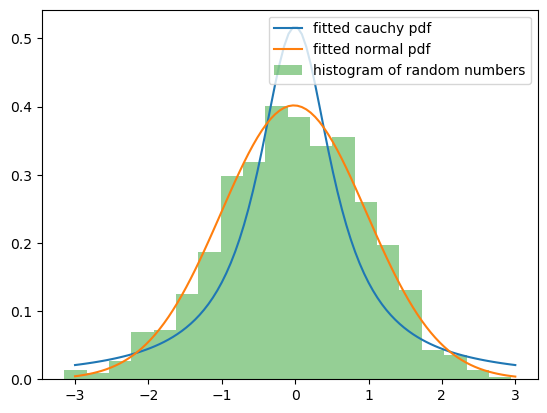

In [ ]:
from scipy.stats import cauchy
loc, scale = cauchy.fit(rvs)
x = np.linspace(-3, 3, 100)
plt.plot(x, cauchy.pdf(x, loc=loc, scale=scale), label='fitted cauchy pdf')
plt.plot(x, norm.pdf(x, loc=mean, scale=std), label='fitted normal pdf')
plt.hist(rvs, density=True, bins=20, alpha=0.5, label='histogram of random numbers')
plt.legend()
plt.show()

#### Discrete distribution

Let's use Poisson distribution as an example.

The `probability mass function (pmf)` is given by:
$$
    f(k) = e^{-\mu} \frac{\mu^k}{k!}    
$$

In [ ]:
from scipy.stats import poisson
mu = 3
poisson_distribution = poisson(mu)

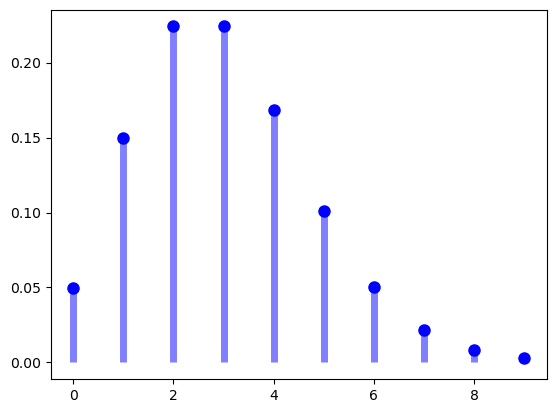

In [ ]:
x = np.arange(0, 10)
plt.plot(x, poisson_distribution.pmf(x), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson_distribution.pmf(x), colors='b', lw=5, alpha=0.5)

CDF, SF, PPF, also included in the discrete distribution class. The way to get the measurements and also how to generate random numbers are the same with the continous disctribution.

***But there is no default fit method for the discrete distribution***

## Entropy

### Boltzmann and Gibbs Entropy Formula


In statistical mechanics, the entropy is proportional to the log of number of microstate of a macrostate.

Consider a system with N particles, and each particle can only have discrete energy of $0, \varepsilon, 2\varepsilon, \dots,$

Let's denote a macrostate as {$n_0, n_1, n_2 \dots, n_k$}, where $n_i$ is the number of particles with energy $i \varepsilon$

So the total number of particles for the system is:
$$N = \sum_{i=0}^k n_i$$

Number of microstates is :
$$\Omega = \frac{N!}{n_0!n_1!n_2!\dots n_k!}$$

The Boltzmann entropy is defined as:
$$S_B = k_B \ln {\Omega}$$

$$
S_B = k_B \ln (\frac{N!}{n_0!n_1!n_2!\dots n_k!}) \\
$$

$$
= k_B \ln(N!) - k_B \sum_i \ln(n_i!)
$$

Apply Stirling's approximation: $\ln(N!) \approx N \ln N - N$ for large N
$$S_B = k_B(N \ln(N) - N) - k_B \sum_i (n_i \ln(n_i) - n_i)$$
Write $n_i$ as $N p_i$, where $p_i$ is the probability that one particle has energy $i \varepsilon$ 
$$= k_B N \ln N - k_B \sum_i N p_i \ln(N p_i)$$

$$= k_B N \ln N - k_B \sum_i N p_i \ln N - k_B N \sum_i p_i \ln p_i$$

As $\sum_i p_i = 1$

$$ S_B = - k_B N \sum_i p_i \ln p_i = k_B N \left< - \ln p_i\right>$$

This formula is known as Gibbs entropy formula. It characterized entropy of a macroscopic state by using a distribution on the microstates.

> During a thermodnamic process, the system will evolute from a macrostate with less number of microstates to the macrostate with the maximal number of microstates. In other word, the final distribution will be the distribution has the largest $- \sum_i p_i \ln p_i$ (Arrow of time)

> If the system does not exchange particles and energy with other systems, $\sum_i n_i$ and $\sum_i n_i \varepsilon_i$ will be two constants. By using Lagrange multiplier method we can get the distribution when the system reach a thermal equilibrium
> $$\frac{\partial}{\partial n_i} (-\sum_i p_i \ln p_i - \alpha \sum_j n_j - \beta \sum_j n_j \varepsilon_j) = 0$$
> Where $\alpha, \beta$ are two Lagrange multipliers.
>
> The solution is $n_i = exp(-\beta \varepsilon_i + c)$, which is known as Boltzmann distribution.

### Shannon entropy

Shannon introduce the concept of information entropy in his 1948 paper [A mathematical Theory of Communication](https://web.archive.org/web/19980715013250/http://cm.bell-labs.com/cm/ms/what/shannonday/shannon1948.pdf)

He want to find a measurment of uncertainty, say H, for a set of possible events whose probabilities of occurrence are $p_1, p_2, \dots, p_n$

1. H should be continuous in the $p_i$

2. If all the $p_i$ are equal, $p_i = \frac{1}{n}$, then H should be a monotonic increasing unction of n. With equally likely events there is more choice, or uncertainty, when there are more possible events.

3. If a choice be broken down into two successive choice, the original H should be the weighted sum of the individual values of H.

![decomposition of a choice](https://github.com/AlexMa123/BIU-ComplexSystem/blob/main/figures/decomposition%20of%20a%20choice.png?raw=true)

This means, for the figure above
$$H(\frac{1}{2}, \frac{1}{3}, \frac{1}{6}) = H(\frac{1}{2}, \frac{1}{2}) + \frac{1}{2} H(\frac{2}{3}, \frac{1}{3})$$

And the Shannon find a H satisfying the three above assumptions:
$$H = - \sum_{i=1}^n p_i \log p_i$$

When $p_i$ obeys:
$$\frac{\partial}{\partial p_i} (-\sum_i p_i \ln p_i)= 0$$
the entropy will reach the maximum. ($p_i = \frac{1}{N}$, and $H_{max} = \log N$)

#### Entropy as a measurement of the uncertainty of the cell's state in Cellular Automaton

In [ ]:
# !pip install cellpylib # run this line if you don't have cellpylib installed 
import cellpylib as cpl
import matplotlib.pyplot as plt
import numpy as np

lambda is a number between zero and one defined as ***the fraction of rules, not counting the all-dead rule, that lead to a living state.***

> A very nice website: [1D Cellular Automata and the Edge of Chaos Info and Instructions](https://math.hws.edu/eck/js/edge-of-chaos/CA-info.html)
>
And Langton didn't think about lyapunov exponents when he wrote his paper because the definition of the Lyapunov exponents relies heavily on the differentiability. Being a discrete set, the configuration space of cellular automata possesses no differentiable structure. 

In fact the lyapunov exponents for a CA is a non-trivial problem. In wolfram's 1985 paper: Twenty Problems in the Theory of Cellular Automata, problem 2 and 3 are related with lyapunov exponents.

> P2 What are the exact relations between entropies and Lyapunov exponents for cellular automata?
> 
> P3 What is the analogue of geometry for the configuration space of a cellular automaton? 

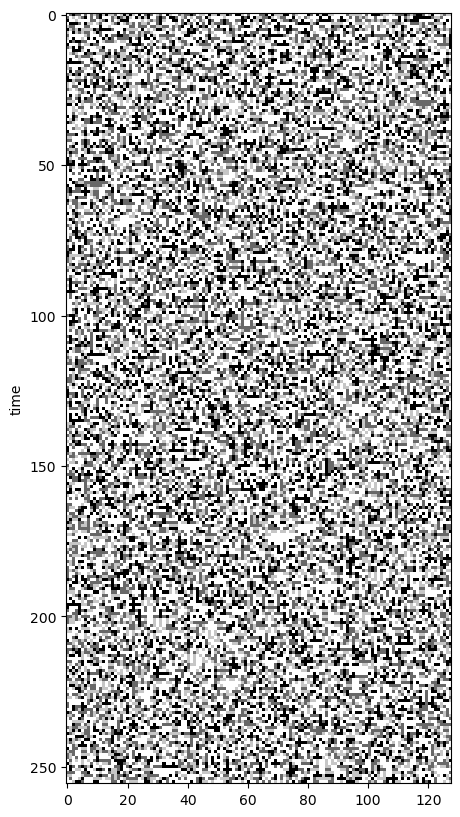

In [ ]:
lambda_val = 0.6

rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_val, k=4, r=2,
                                                                   quiescent_state=0,
                                                                   isotropic=True)

cellular_automaton = cpl.init_random(128, k=4)

# use the built-in table_rule to use the generated rule table
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=256,
                                apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=2)
plt.figure(figsize=(10, 10))
cpl.plot(cellular_automaton)

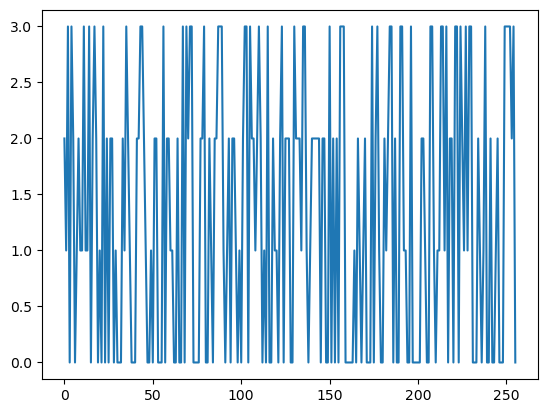

In [ ]:
cell_evolution = cellular_automaton[:,  64]
plt.plot(cell_evolution)

In [ ]:
# get a historgram
p, bin_edge = np.histogram(cell_evolution, bins=np.arange(-0.5, 4.5, 1), density=True)
p = p[p != 0]
# calculate the entropy
print("Entropy: ", -np.sum(p * np.log2(p)))

Entropy:  1.9397049970556859


In [ ]:
cpl.average_cell_entropy(cellular_automaton)

1.9015043652923875

# Exercise

1. What is the probability that at a given time t, there are n numbers of $O_2$ moleculers in our lungs of volume v ? Assume that $O_2$ molecules behave as an ideal gas and calculate the mean of n: $\left< n \right>$ and the relative fluctuations.

Write latex formulas between \$ \$ or \$\$ \$\$

2.
a. Simulate Boltzmann distribution

* start from a system with N=10000 particles, each particle started with a value M (mean energy)
* Randomly pick two particles $p_i$, $p_j$, and let the energies exchange; $E_1$ = $E_{1}^{old} - 1$, $E_2$ = $E_2^{old} + 1$ 
* Repeat this process $10^8$ times

In [ ]:
import numpy as np
from numba import njit
@njit
def Boltzmann_simulation(M=10, N=10000, repeats=10**8):
    # initialize a 1d array of length N, full of M
    energies = np.full((N), M)

    # exchange energy between two random cells, repeat by a for loop
    for _ in range(repeats):
        # randomly select two particles, 
        # use np.random.randint(N) to get a random integer between 0 and N-1

        # exchange energy
        # !!! Note !!! : please make sure that the energy always stays positive
        raise NotImplementedError # Remove this line after you implement the function
    return energies

energies = Boltzmann_simulation()

The following code is for checking whether your result is a Boltzmann distribution or not.

The fitted mean for M=64 is 64.0
The fitted mean for M=32 is 32.0
The fitted mean for M=16 is 16.0
The fitted mean for M=8 is 8.0


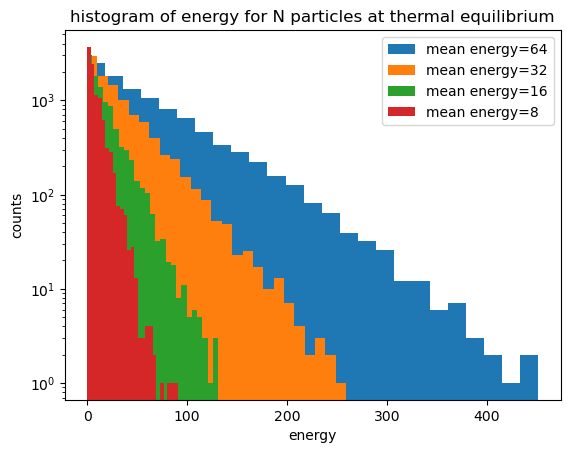

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import expon # exponential distribution

for mean_m in [64, 32, 16, 8]:
    energies = Boltzmann_simulation(mean_m)
    # Fit the energy with a exponential distribution
    print(f"The fitted mean for M={mean_m} is {expon.fit(energies)[1]}")

    # visualize the distribution
    plt.hist(energies, bins=25, label=f'mean energy={mean_m}')
plt.yscale('log')
plt.xlabel("energy")
plt.ylabel("counts")
plt.legend()
plt.title("histogram of energy for N particles at thermal equilibrium")
plt.show()

b. Define your function to measure the entropy from the particle's energy using Gibb's formula (ignore the constant). Check whether the entropy always increase.

In [ ]:
def entropy(energies):
    """
    The function will use the particle's energy as an input (the result you get from the function Boltzmann_simulation)
    And output the entropy
    """
    raise NotImplementedError

(0.0, 100.0)

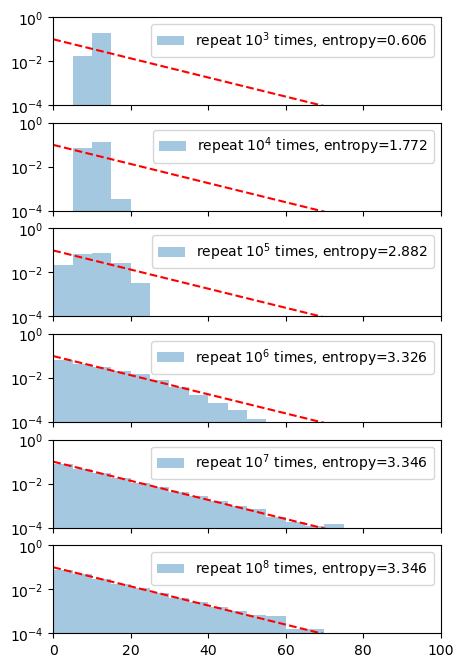

In [ ]:
# For checking the entropy
num_repeats = [1000, 10000, 100000, 1000000, 10000000, 100000000]
fig, ax = plt.subplots(len(num_repeats), 1, figsize=(5, 8), sharex=True)
exponent_distribution = expon(0, 10)
x = np.arange(0, 100)
pdf = exponent_distribution.pdf(x)
for i, n in enumerate(num_repeats):
    energies = Boltzmann_simulation(repeats=n)
    ax[i].hist(energies, bins=np.arange(0, 100, 5), alpha=0.4, density=True, label=f"repeat $10^{int(np.log10(n))}$ times, entropy={entropy(energies):.3f}")
    ax[i].plot(x, pdf, 'r--')
    ax[i].legend()
    ax[i].set_yscale('log')
    ax[i].set_ylim(0.0001, 1)
ax[i].set_xlim(0, 100)